In [61]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

df = pd.read_csv('results.csv')
df.columns = df.columns.str.strip()
df['Algorithm']=df['Algorithm'].str.strip()
df['Benchmark']=df['Benchmark'].str.strip()

In [62]:
print(color_pal[0])

#1f77b4


In [63]:
df.head()

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.188930,0.995865,0.81160
1,bimodal,perl,1.933900,0.971272,3.97542
2,bimodal,soplex,0.287601,0.928403,12.97650
3,bimodal,povray,1.284190,0.927332,10.52470
4,gshare,gcc,2.208660,0.996729,0.64190


In [64]:
df[df['Benchmark'] == 'gcc']

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.18893,0.995865,0.81160
4,gshare,gcc,2.20866,0.996729,0.64190
8,hp,gcc,2.22541,0.997362,0.51766
12,perceptron,gcc,2.21491,0.996879,0.61248
16,tage,gcc,2.22633,0.997411,0.50820
20,ltage,gcc,2.22616,0.997405,0.50936


In [65]:
df.loc[df['Algorithm'] == 'bimodal']

,Algorithm,Benchmark,IPC,Accuracy,MPKI
0,bimodal,gcc,2.188930,0.995865,0.81160
1,bimodal,perl,1.933900,0.971272,3.97542
2,bimodal,soplex,0.287601,0.928403,12.97650
3,bimodal,povray,1.284190,0.927332,10.52470


In [66]:
[item for sublist in df.loc[df['Benchmark'] == 'gcc', ['IPC']].values.tolist() for item in sublist]

[2.18893, 2.20866, 2.22541, 2.21491, 2.22633, 2.22616]

In [67]:
def draw_bar_graph(metric, algorithms, spectype):
        # changes constants based on SPEC benchmark type
        if spectype == 'int':
                start = 0
                end = 2
                benchmarks = ['gcc', 'perl']
        else:
                start = 2
                end = 4
                benchmarks = ['soplex', 'povray']

        # set width of bar
        barWidth = 0.1
        fig = plt.subplots(figsize =(12, 8))

        # set height of bar
        bars = []
        for algo in algorithms:
                bars.append(
                        [item 
                         for sublist in df.loc[df['Algorithm'] == algo, [metric]].values.tolist() 
                         for item in sublist][start:end]
                )
        
        full_list = [val for sublist in bars for val in sublist]
        std = np.std(full_list)
        
        # Set position of bar on X axis
        br = []
        for i in range(len(bars)):
                if i == 0:
                        br.append(np.arange(len(bars[0])))
                else:
                        br.append([x + barWidth for x in br[-1]])

        # Make the plot
        for i, algo in enumerate(algorithms):
                plt.bar(br[i], bars[i], color=color_pal[i], width=barWidth, edgecolor='grey', label=algo)

        plt.ylim(max(min(full_list)-std, 0), max(full_list)+std)

        # Adding Xticks
        plt.xlabel(f'SPEC{spectype} Benchmark', fontweight ='bold', fontsize = 15)
        plt.ylabel(metric, fontweight ='bold', fontsize = 15)
        plt.xticks([r + barWidth for r in range(len(bars[0]))],
                benchmarks)

        plt.legend()
        plt.show()

In [68]:
algorithms = ['bimodal', 'gshare', 'hp', 'perceptron', 'tage', 'ltage']

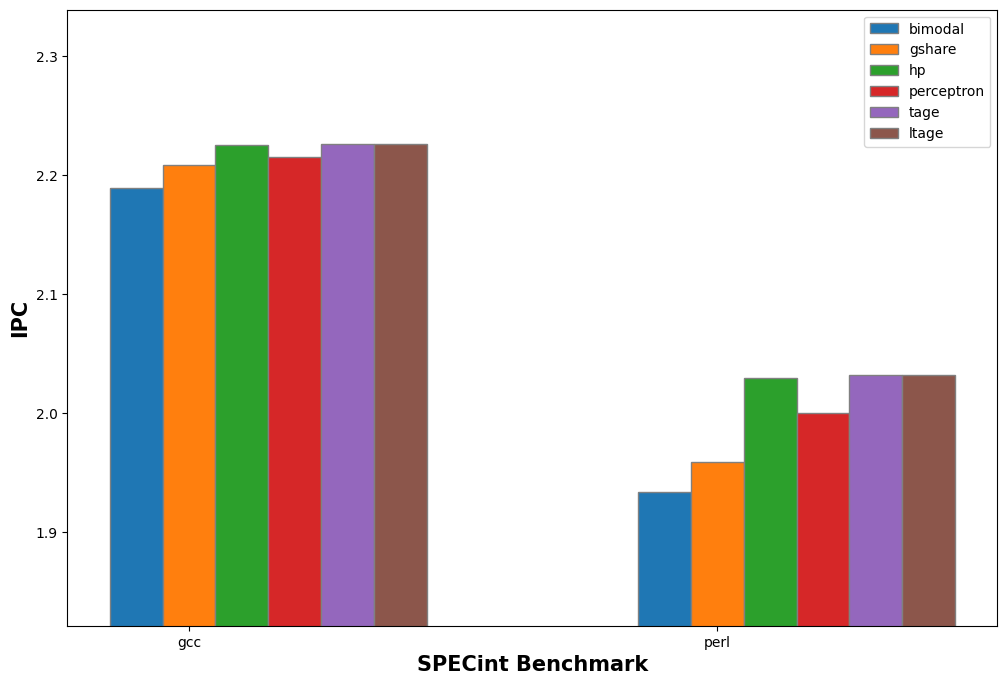

In [69]:
draw_bar_graph('IPC', algorithms, 'int')

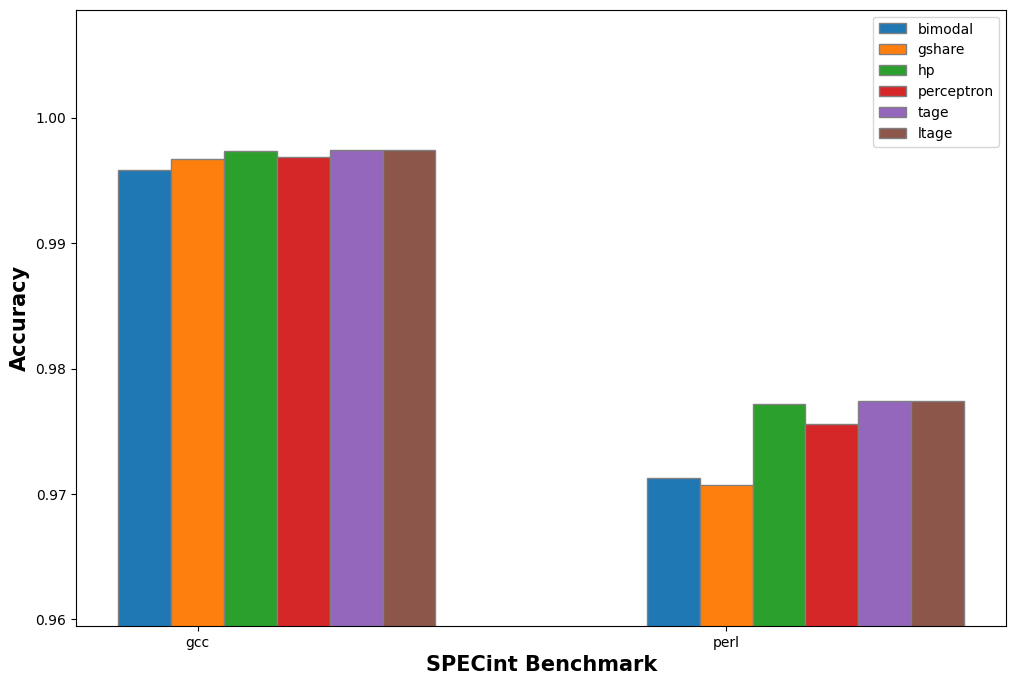

In [70]:
draw_bar_graph('Accuracy', algorithms, 'int')

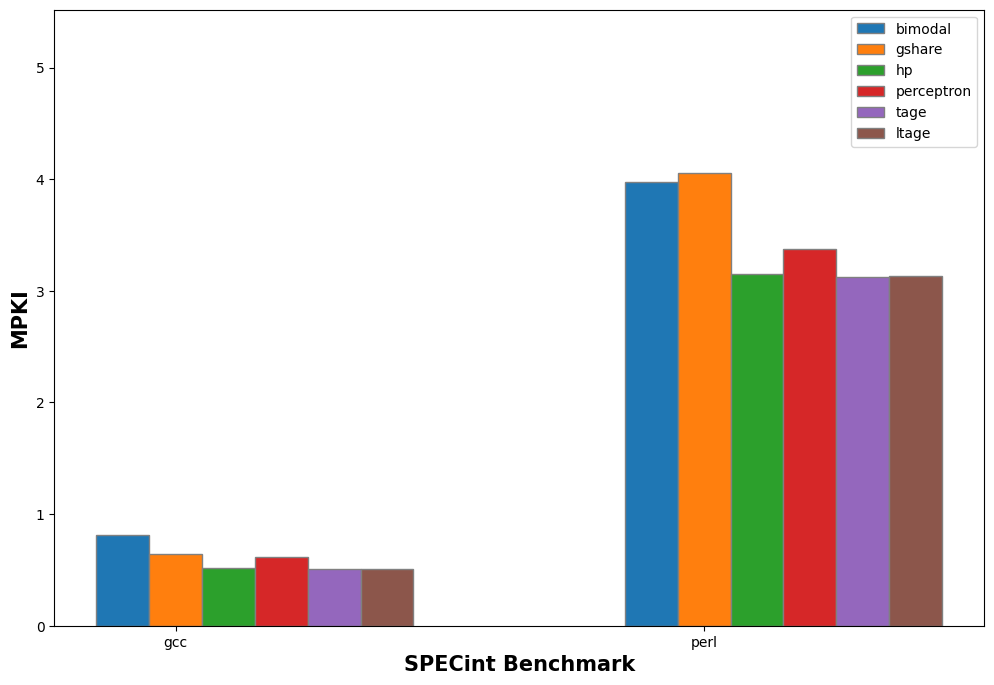

In [71]:
draw_bar_graph('MPKI', algorithms, 'int')

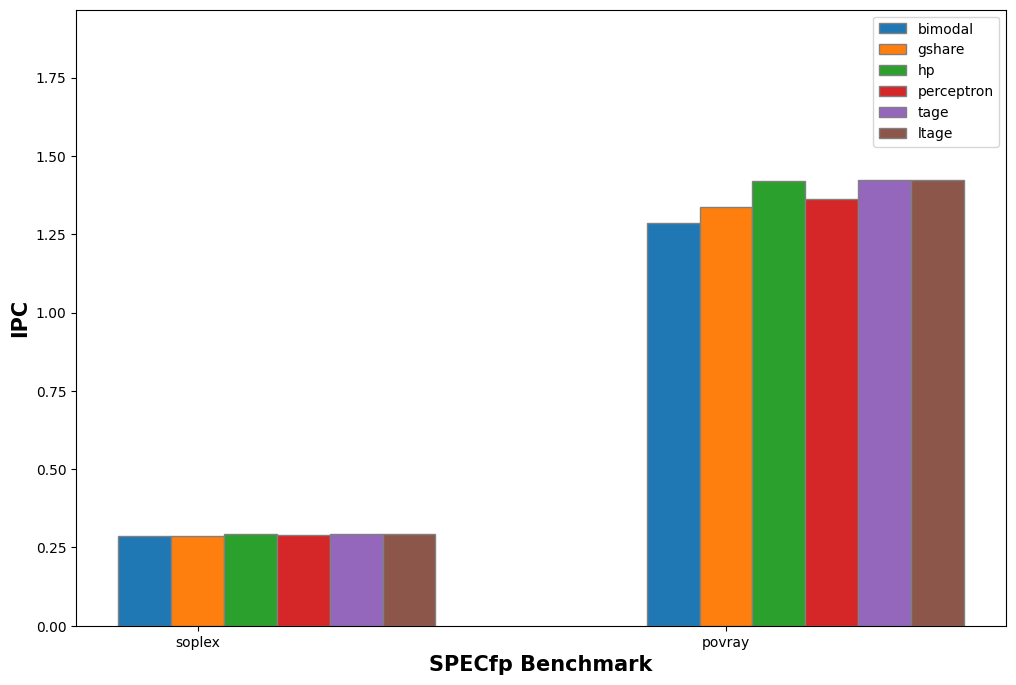

In [72]:
draw_bar_graph('IPC', algorithms, 'fp')

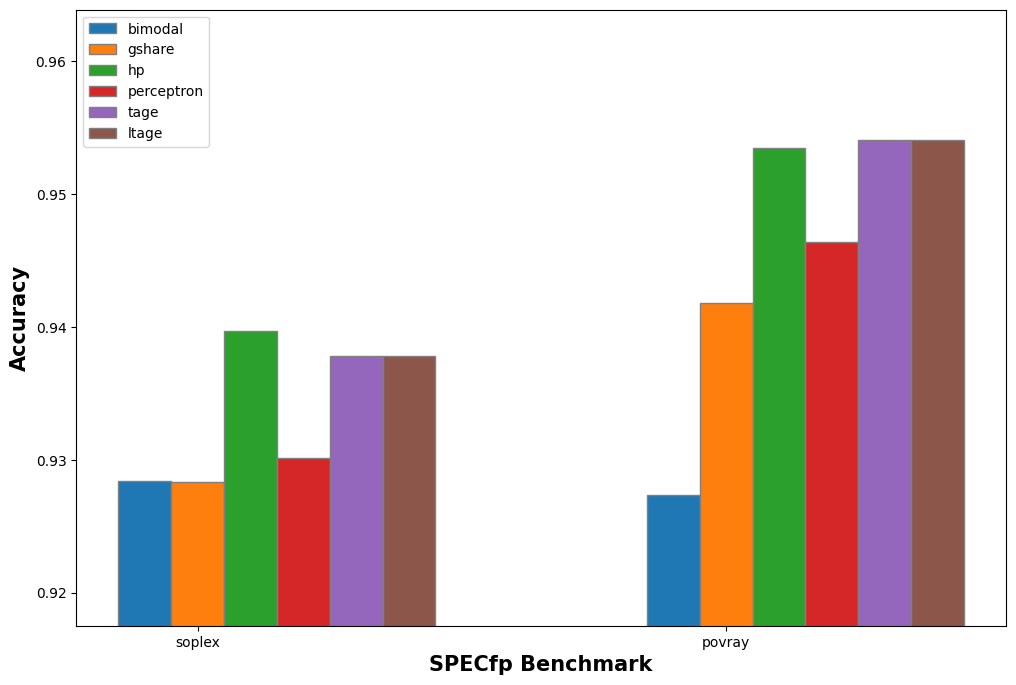

In [73]:
draw_bar_graph('Accuracy', algorithms, 'fp')

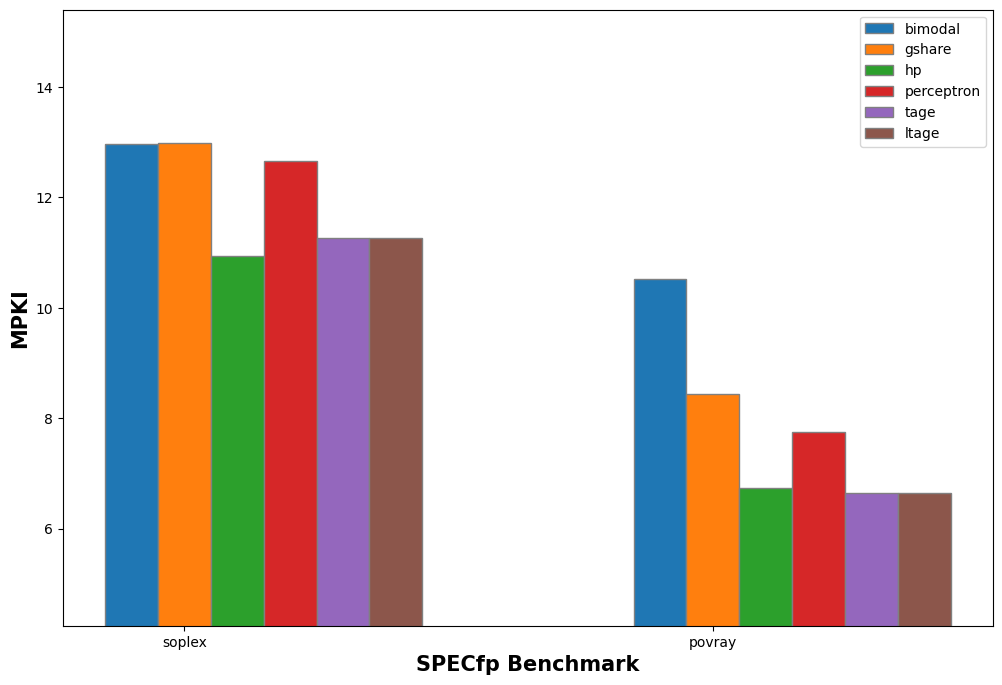

In [74]:
draw_bar_graph('MPKI', algorithms, 'fp')